In [0]:
from google.colab import drive
drive.mount('/content/drive')

**<font size='5' color='black'>Import Library</font>**

In [0]:
#@markdown **<font color='grey'>Click to import and install**
!rm '/content/clustering' -rf
!git clone 'http://www.github.com/Nak007/clustering.git'

!pip install factor-analyzer
import pandas as pd, numpy as np
from clustering import pca_analysis as pca, cluster as cls
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format =  '{:,.2f}'.format

## **<font size='6' color='#0652DD'>&clubs; Factor Analysis</font>**

### **<font color='#0652DD'>( 1 ) Dataset</font>**
---
Simulate dataset from sklearn.datasets.make_blobs

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs( n_samples=1000, n_features=8, centers=4, cluster_std=2, center_box=(-10,10), random_state=100)
X = pd.DataFrame(X, columns=['feature_{0}'.format(n) for n in range(1,X.shape[1]+1)])

In [19]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-5.78,-1.57,7.10,-8.02,-7.16,-9.97,-9.29,9.03
1,6.74,-5.39,8.92,-5.55,-2.94,9.24,6.24,-1.74
2,-1.56,-4.06,-2.65,12.39,-9.66,-9.70,4.62,4.39
3,-0.66,-3.15,2.80,9.07,-13.06,-7.74,3.20,4.77
4,6.50,-6.19,5.27,-2.72,1.61,10.24,8.09,-3.30


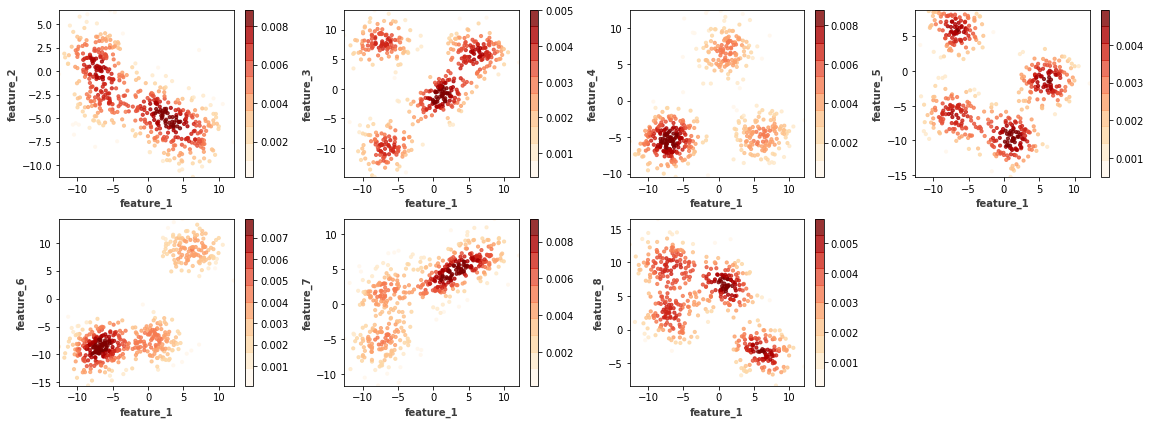

In [22]:
f_plot = pca.plot_factors(0, 0.5, 0, 4)
f_plot.fit(X, 'feature_1', fname=None)

Observe separation of distributions from histogram plots

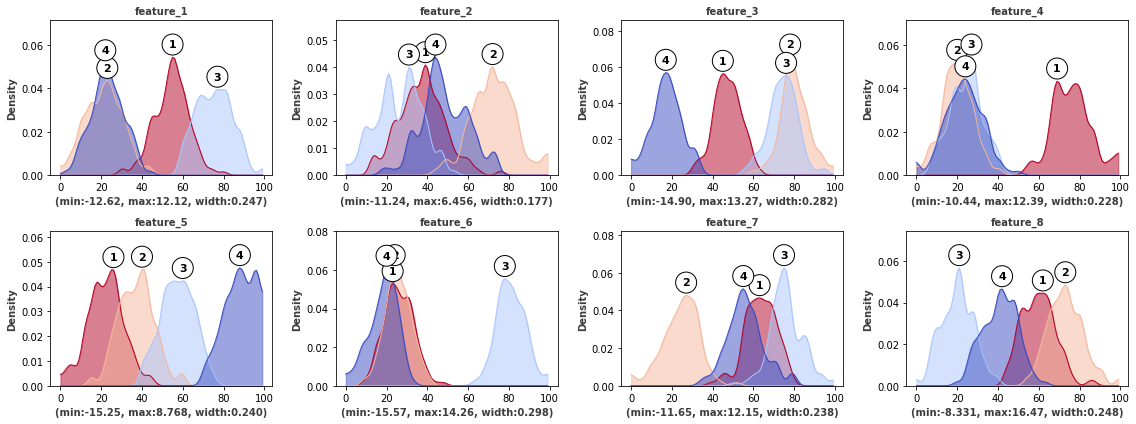

In [24]:
colors = cls.matplotlib_cmap('coolwarm_r',len(np.unique(y)))
cls.cluster_factors(n_columns=4, frac=0.3).fit(X, y, a=1, method='hist',colors=colors, sigma=2)

### **<font color='#0652DD'>( 2 ) Capping Outliers</font>**

In [0]:
m = pca.outliers(method='gamma')
m.fit(X)
capped_X = pd.DataFrame(m.capped_X)

In [0]:
# list of lower and upper bounds
#pd.DataFrame(m.limit_).head()

### **<font color='#*0652DD*'>( 3 ) Standardization</font>**

In [0]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler

In [0]:
# method: {'shift_scale','robust','q_normal','q_uniform'}
X_std = QuantileTransformer(output_distribution='normal').fit_transform(capped_X)
#X_std = StandardScaler().fit_transform(capped_X)
X_std = pd.DataFrame(X_std,columns=list(capped_X))

### **<font color='#0652DD'>( 4.1 ) Principal Component Analysis</font>**

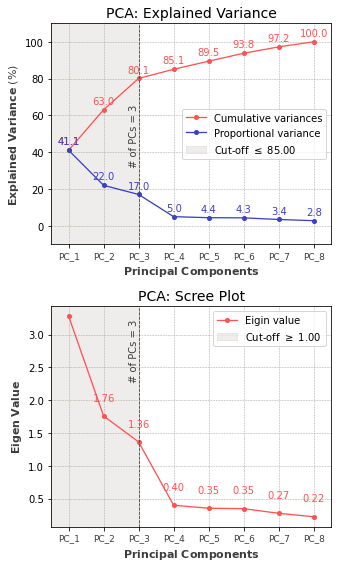

In [29]:
pca_ = pca.principal_components(85,1)
pca_.fit(X_std)
pca_.plot(fname=None)

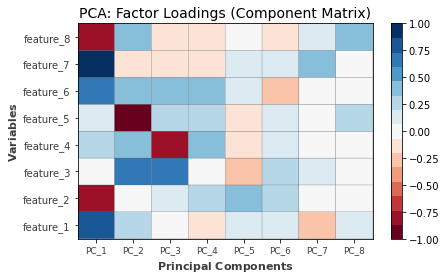

In [30]:
pca_.plot_factor_loadings(fname=None)

In [31]:
pc_score = pca_.transform(X_std, n_comps=8)
pc_score.head(4)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,-4.36,0.44,1.40,-0.74,-0.21,-0.14,-0.61,-0.14
1,3.91,1.03,1.76,-0.01,0.01,0.22,0.08,0.08
2,1.10,2.20,-5.27,1.15,-0.56,0.73,0.16,0.04
3,0.26,2.71,-2.25,0.10,0.15,0.08,0.05,-0.39


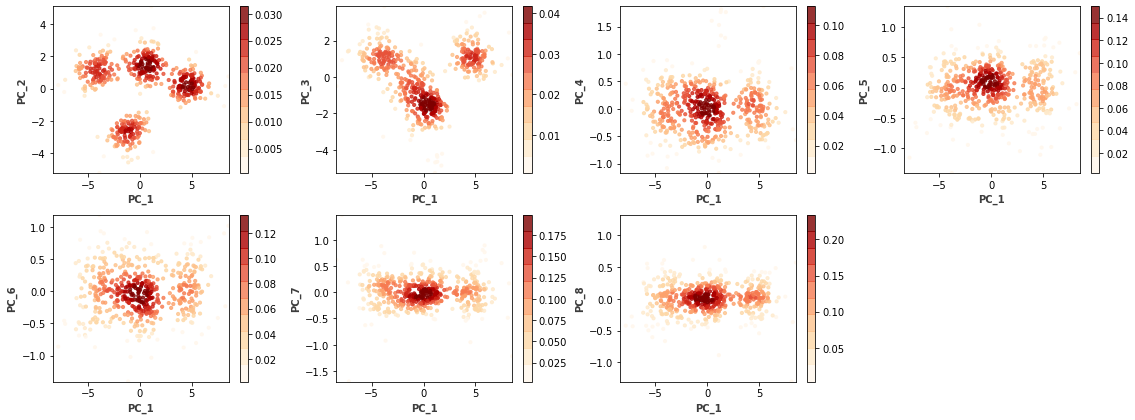

In [33]:
f_plot = pca.plot_factors(0, 0.5, 0, 4)
f_plot.fit(pc_score,'PC_1',fname=None)

### **<font color='#0652DD'>( 4.2 ) Factor Rotation</font>**

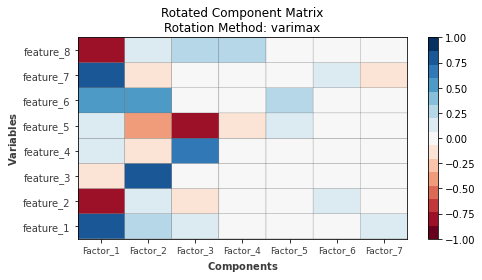

In [41]:
rotated_pc = pca.factor_analysis(X_std.corr()) # try correlation instead of 'pca_.loadings'
rotated_pc.fit(7,'varimax')
rotated_pc.plot(fname=None)

In [42]:
factor_score = rotated_pc.transform(X_std)
factor_score.head(4)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7
0,-4.19,0.82,-0.72,0.40,-0.47,-0.13,0.17
1,3.64,1.95,-0.33,-0.23,0.27,0.08,0.15
2,0.92,-1.47,4.54,-0.05,0.04,-0.07,-0.04
3,0.09,0.54,3.10,0.25,-0.12,0.07,0.06


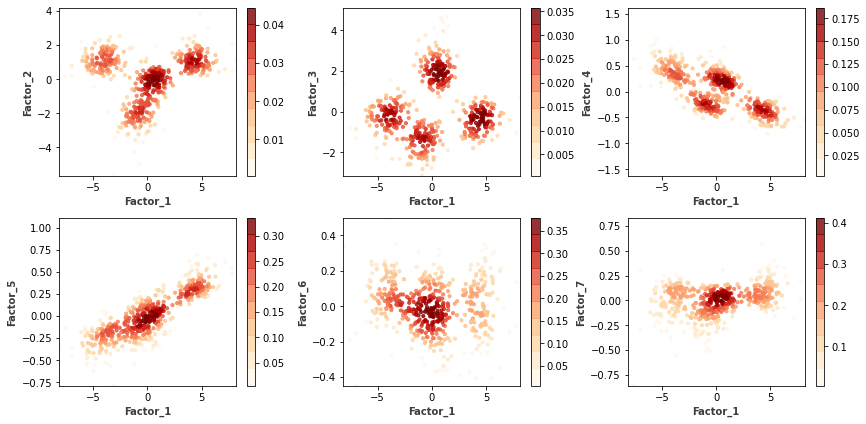

In [43]:
f_plot = pca.plot_factors(0, 0.5, 0, 3)
f_plot.fit(factor_score, 'Factor_1', fname=None)

### **<font color='#0652DD'>( 5 ) Factor Analysis Dataset</font>**

In [0]:
kwargs = dict(how='left', left_index=True, right_index=True)
df = capped_X.merge(pc_score,**kwargs).merge(factor_score,**kwargs)

In [45]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7
0,-5.78,-1.57,7.10,-8.02,-7.16,-9.97,-9.29,9.03,-4.36,0.44,1.40,-0.74,-0.21,-0.14,-0.61,-0.14,-4.19,0.82,-0.72,0.40,-0.47,-0.13,0.17
1,6.74,-5.39,8.92,-5.55,-2.94,9.24,6.24,-1.74,3.91,1.03,1.76,-0.01,0.01,0.22,0.08,0.08,3.64,1.95,-0.33,-0.23,0.27,0.08,0.15
2,-1.56,-4.06,-2.65,10.51,-9.66,-9.70,4.62,4.39,1.10,2.20,-5.27,1.15,-0.56,0.73,0.16,0.04,0.92,-1.47,4.54,-0.05,0.04,-0.07,-0.04
3,-0.66,-3.15,2.80,9.07,-13.06,-7.74,3.20,4.77,0.26,2.71,-2.25,0.10,0.15,0.08,0.05,-0.39,0.09,0.54,3.10,0.25,-0.12,0.07,0.06
4,6.50,-6.19,5.27,-2.72,1.61,10.24,8.09,-3.30,5.30,0.06,0.60,0.44,0.07,0.06,0.18,0.16,5.02,0.74,-0.17,-0.47,0.50,0.04,0.03


## **<font size="6" color='#009432'>&spades; Clustering with PCA</font>**

Select features ==> Principal Components

In [0]:
features = df.columns[df.columns.str.contains('PC')]

### **<font color='#009432'>( 1.1 ) KMeans Clustering</font>**

In [0]:
k_pca = cls.cluster_kmeans(p_samples=0.2,n_bootstraps=50,**dict(random_state=10))
k_pca.fit(df[features])

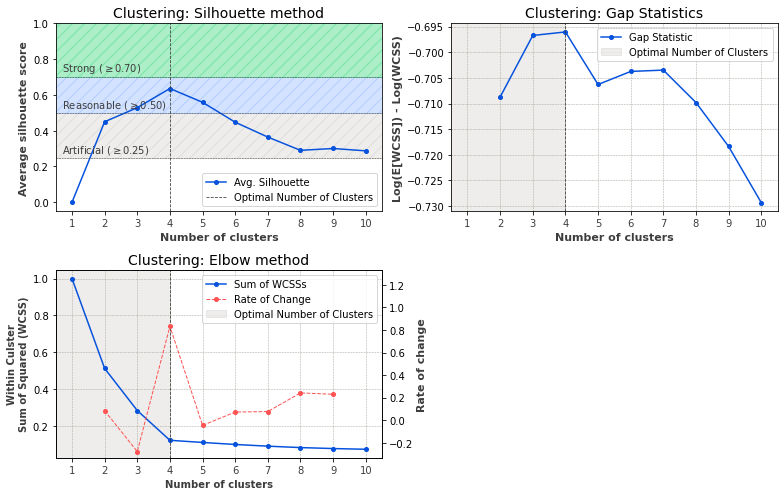

In [63]:
cls.cluster_results(k_pca.data)

### **<font color='#009432'>( 1.2 ) Hierarchical clustering</font>**

In [0]:
h_pca = cls.cluster_linkage()
h_pca.fit(df[features])

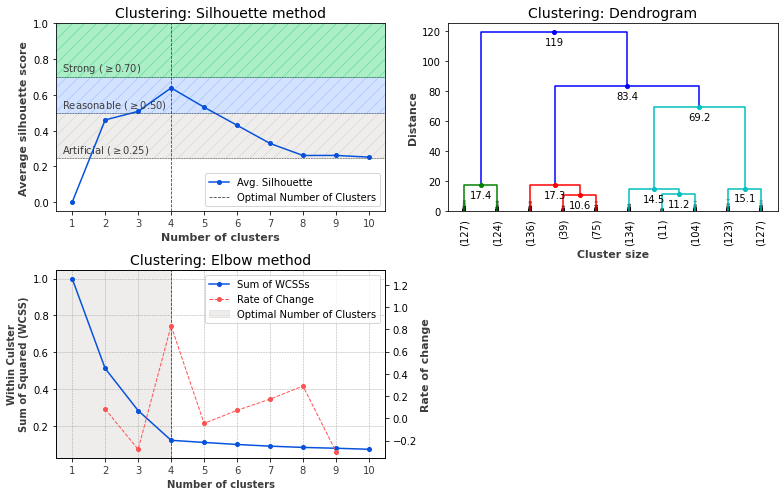

In [66]:
cls.cluster_results(h_pca.data)

### **<font color='#009432'>( 2 ) Clustering Analysis</font>**

In [0]:
# Select labels from KMeans
labels = k_pca.data['labels'][:,3]
colors = cls.matplotlib_cmap('coolwarm_r',np.unique(labels).shape[0])

#### **<font color='#009432'>( 2.1 ) Pie chart</font>**
---
Proportion of respective clusters

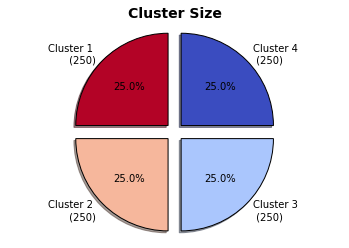

In [52]:
fig, axis = plt.subplots()
cls.cluster_pie(axis, labels, colors=colors)
axis.set_title('Cluster Size',fontsize=14, fontweight='bold')
plt.show()

#### **<font color='#009432'>( 2.2 ) Radar chart</font>**
---
Observe differences among clusters

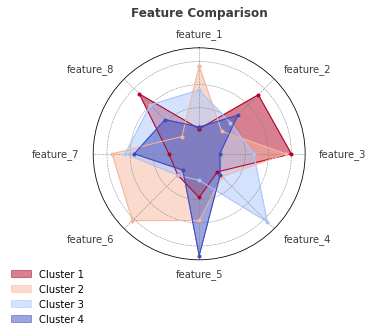

In [53]:
r1 = cls.radar_plot(**dict(marker='o', ms=3))
c = [n for n in list(df) if str(n).find('feature')>-1]
r1.fit(df[c], labels, q=50, title='Feature Comparison\n')

#### **<font color='#009432'>( 2.3 ) Scatter chart</font>**
---
Use pairwise comparison to observe interaction of variables

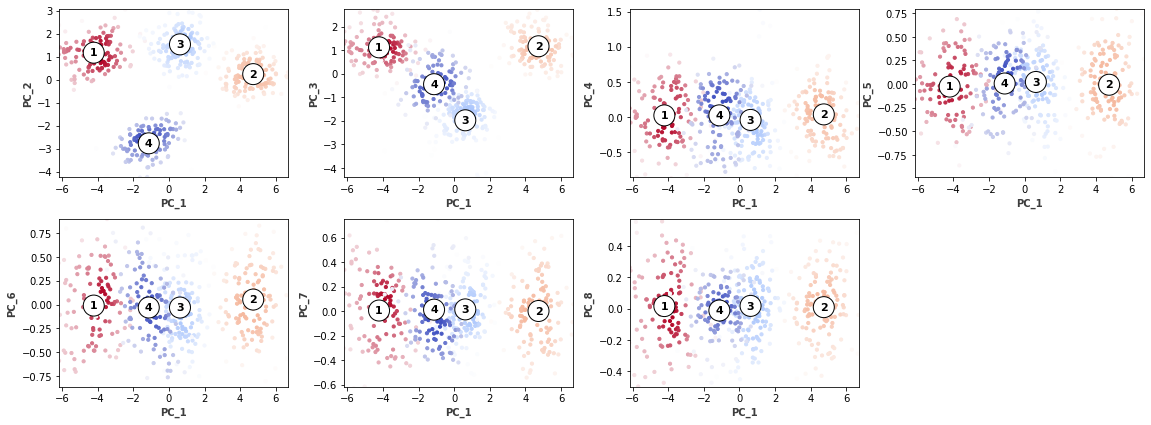

In [54]:
p1 = cls.cluster_factors(n_columns=4, frac=0.3)
c = [n for n in list(df) if str(n).find('PC')>-1]
p1.fit(df[c], labels, a=1, method='scatter',colors=colors)

#### **<font color='#009432'>( 2.4 ) PDF chart</font>**
---
Use Probability Density as well as Maximum Likelihood Estimators to oberve how each cluster form its own distribution 

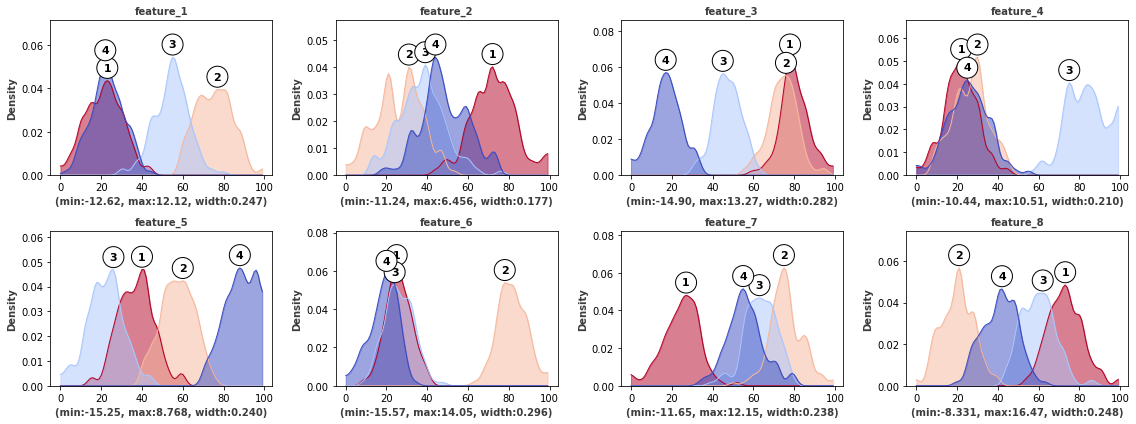

In [55]:
c = [n for n in list(df) if str(n).find('feature')>-1]
p1.fit(df[c], labels, method='hist', sigma=2, colors=colors)

## **<font size="6" color='#ED4C67'>&hearts; Clustering with Factor Rotation</font>**

Select features ==> Factor

In [0]:
features = df.columns[df.columns.str.contains('Factor')]

### **<font color='#ED4C67'>( 1.1 ) KMeans Clustering</font>**

In [0]:
k_factor = cls.cluster_kmeans(p_samples=0.2,n_bootstraps=50,**dict(random_state=10))
k_factor.fit(df[features])

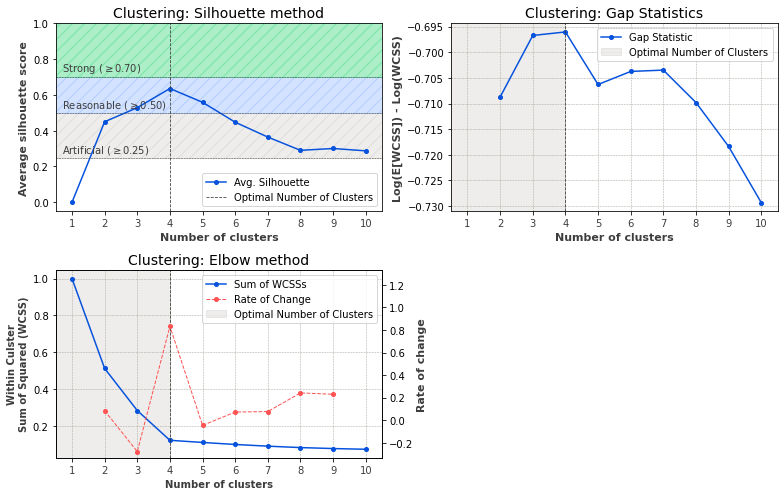

In [69]:
cls.cluster_results(k_factor.data)

### **<font color='#ED4C67'>( 1.2 ) Hierarchical clustering</font>**

In [0]:
h_factor = cls.cluster_linkage()
h_factor.fit(df[features])

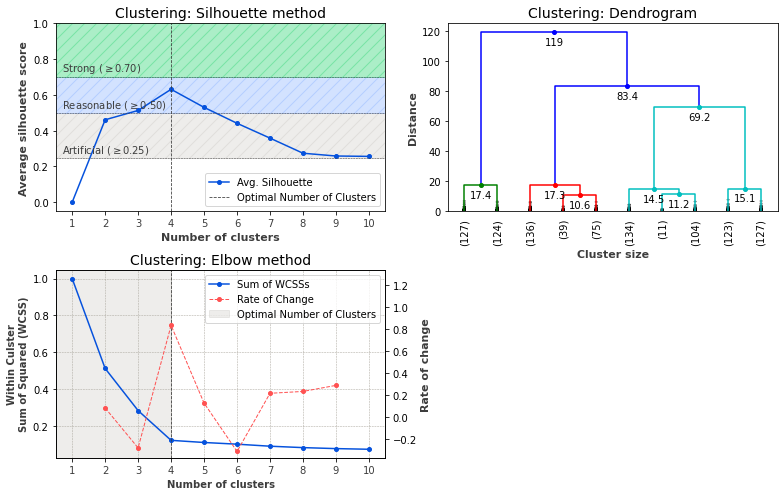

In [71]:
cls.cluster_results(h_factor.data)

### **<font color='#ED4C67'>( 2 ) Clustering Analysis</font>**

In [0]:
labels = k_factor.data['labels'][:,3]
colors = cls.matplotlib_cmap('coolwarm_r',np.unique(labels).shape[0])

#### **<font color='#ED4C67'>( 2.1 ) Pie chart</font>**
---
Proportion of respective clusters

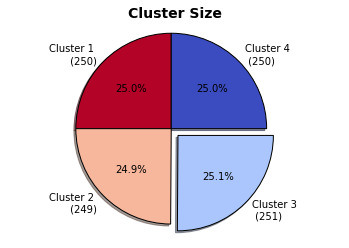

In [73]:
fig, axis = plt.subplots()
cls.cluster_pie(axis, labels, colors=colors)
axis.set_title('Cluster Size',fontsize=14, fontweight='bold')
plt.show()

#### **<font color='#ED4C67'>( 2.2 ) Radar chart</font>**
---
Observe differences among clusters

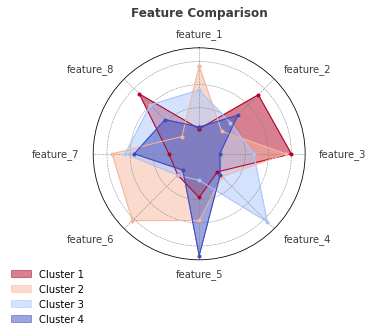

In [74]:
r1 = cls.radar_plot(**dict(marker='o', ms=3))
c = [n for n in list(df) if str(n).find('feature')>-1]
r1.fit(df[c], labels, q=50, title='Feature Comparison\n')

#### **<font color='#ED4C67'>( 2.3 ) Scatter chart</font>**
---
Use pairwise comparison to observe interaction of variables

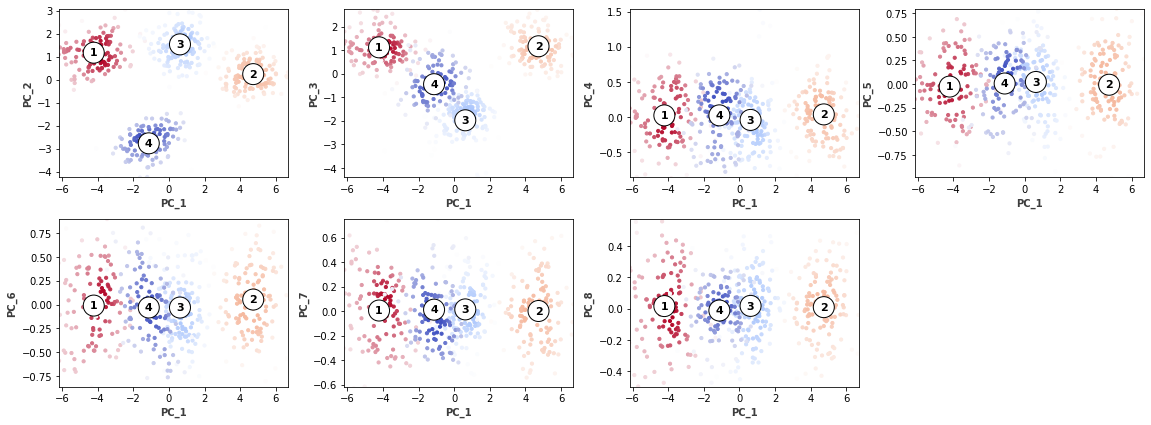

In [77]:
p1 = cls.cluster_factors(n_columns=4, frac=0.3)
c = [n for n in list(df) if str(n).find('PC')>-1]
p1.fit(df[c], labels, a=1, method='scatter',colors=colors)

#### **<font color='#ED4C67'>( 2.4 ) PDF chart</font>**
---
Use Probability Density as well as Maximum Likelihood Estimators to oberve how each cluster form its own distribution 

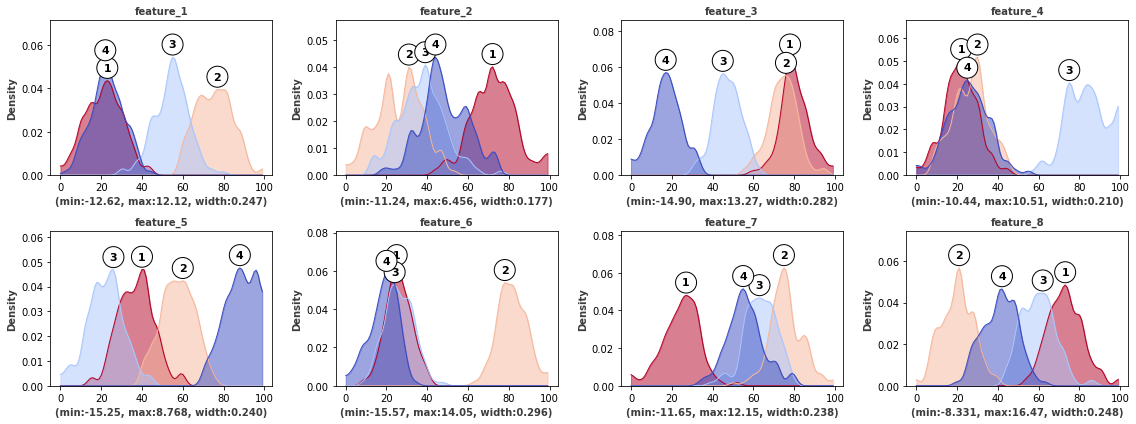

In [76]:
c = [n for n in list(df) if str(n).find('feature')>-1]
p1.fit(df[c], labels, method='hist', sigma=2, colors=colors)

## **<font size="5" color='#576574'>Final Cluster</font>**
---
Select parameters and method that best answer business interpretation and practicality

In [0]:
# we select 4 clusters
df['pca_cluster'] = k_pca.data['labels'][:,3]
df['fac_cluster'] = k_factor.data['labels'][:,3]
df.to_csv('/content/drive/My Drive/Colab Notebooks/clustering.txt',sep='|')